<a href="https://colab.research.google.com/github/dinaomidvartehrani/Applied-AI-/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Data Preprocessing
data = pd.read_csv('adult.csv')

# Handling missing values
data = data.dropna()

# Encoding categorical variables
data = pd.get_dummies(data)

# Splitting into features and target variable
X = data.drop('income_<=50K', axis=1)
y = data['income_<=50K']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Model Architecture
# The input_shape is set to (X_train.shape[1],), which corresponds to the number of features.
# The first dense layer has 64 neurons and uses the ReLU (Rectified Linear Unit)
# activation function. It introduces non-linearity into the neural network,
#  allowing it to learn complex patterns in the data.
# The sigmoid activation function squashes the output between 0 and 1, making it
#  suitable for binary classification problems. The output value represents the
#   probability of the input belonging to the positive class (income >$50,000).
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Step 4: Model Training
# We use 'adam' optimizer , which is a popular optimization algorithm known for
# its efficiency and adaptive learning rate. Also we use 'binary_crossentropy' as
# the loss function. It is suitable for binary classification tasks.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=10, batch_size=32)
# Store accuracy values for each epoch
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)

Epoch 1/10
814/814 [==============================] - 3s 3ms/step - loss: 0.0490 - accuracy: 0.9831 - val_loss: 0.0045 - val_accuracy: 0.9983
Epoch 2/10
814/814 [==============================] - 3s 3ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0083 - val_accuracy: 0.9988
Epoch 3/10
814/814 [==============================] - 3s 4ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0051 - val_accuracy: 0.9991
Epoch 4/10
814/814 [==============================] - 3s 4ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0019 - val_accuracy: 0.9994
Epoch 5/10
814/814 [==============================] - 5s 6ms/step - loss: 3.3675e-05 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 0.9994
Epoch 6/10
814/814 [==============================] - 5s 6ms/step - loss: 1.3033e-05 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9995
Epoch 7/10
814/814 [==============================] - 3s 3ms/step - loss: 6.1606e-06 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 0

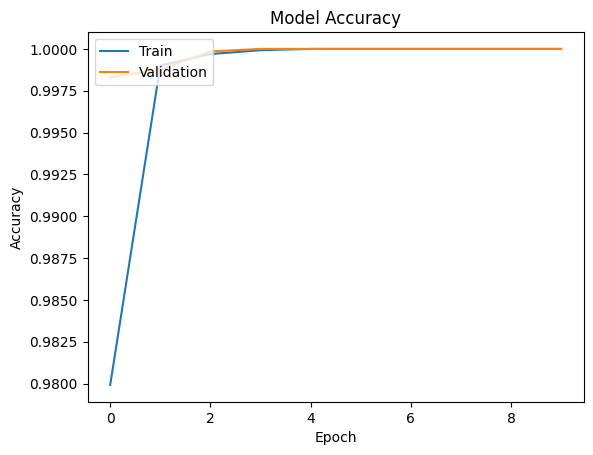

In [16]:
# Plotting accuracy progress during training
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()